## Import Libraries

In [1]:
# Data Preproccessing
import numpy as np
import pandas as pd
# Plot Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# SkitLearn Library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Read Dataset

In [2]:
#importing dataset using panda
data_diamonds = pd.read_csv('./diamonds.csv')
#to see what my dataset is comprised of
data_diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
#dimension of dataset
data_diamonds.shape

(53940, 11)

In [4]:
#checking for categorical data
data_diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
# show dataset
data_diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
# create a copy of dataset
df = data_diamonds.copy()
# Convert Object-type features to Category-type features
df[['cut']] = df[['cut']].astype('category')
df[['color']] = df[['color']].astype('category')
df.dtypes
df = pd.get_dummies(df, columns=['cut', 'clarity', 'color'], dtype=np.float64)
df

,Unnamed: 0,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,...,clarity_VS2,clarity_VVS1,clarity_VVS2,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,1,0.23,61.5,55.0,326,3.95,3.98,2.43,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2,0.21,59.8,61.0,326,3.89,3.84,2.31,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3,0.23,56.9,65.0,327,4.05,4.07,2.31,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,0.29,62.4,58.0,334,4.20,4.23,2.63,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,0.31,63.3,58.0,335,4.34,4.35,2.75,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,60.8,57.0,2757,5.75,5.76,3.50,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
53936,53937,0.72,63.1,55.0,2757,5.69,5.75,3.61,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
53937,53938,0.70,62.8,60.0,2757,5.66,5.68,3.56,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
53938,53939,0.86,61.0,58.0,2757,6.15,6.12,3.74,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [7]:
# Dimension after data preproccessing
df.shape

(53940, 28)

## data distribution of price feature

C:\Users\M0jtabav1\AppData\Local\Temp\ipykernel_19096\2348761767.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


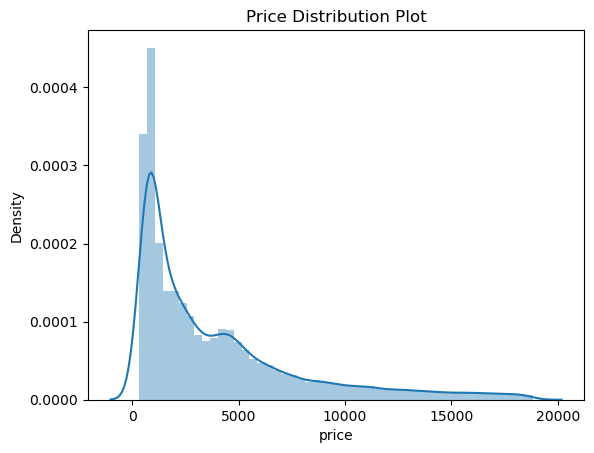

In [8]:
# Data distribution
plt.title('Price Distribution Plot')
sns.distplot(df['price'])
plt.show()

## Heatmap

<Axes: >

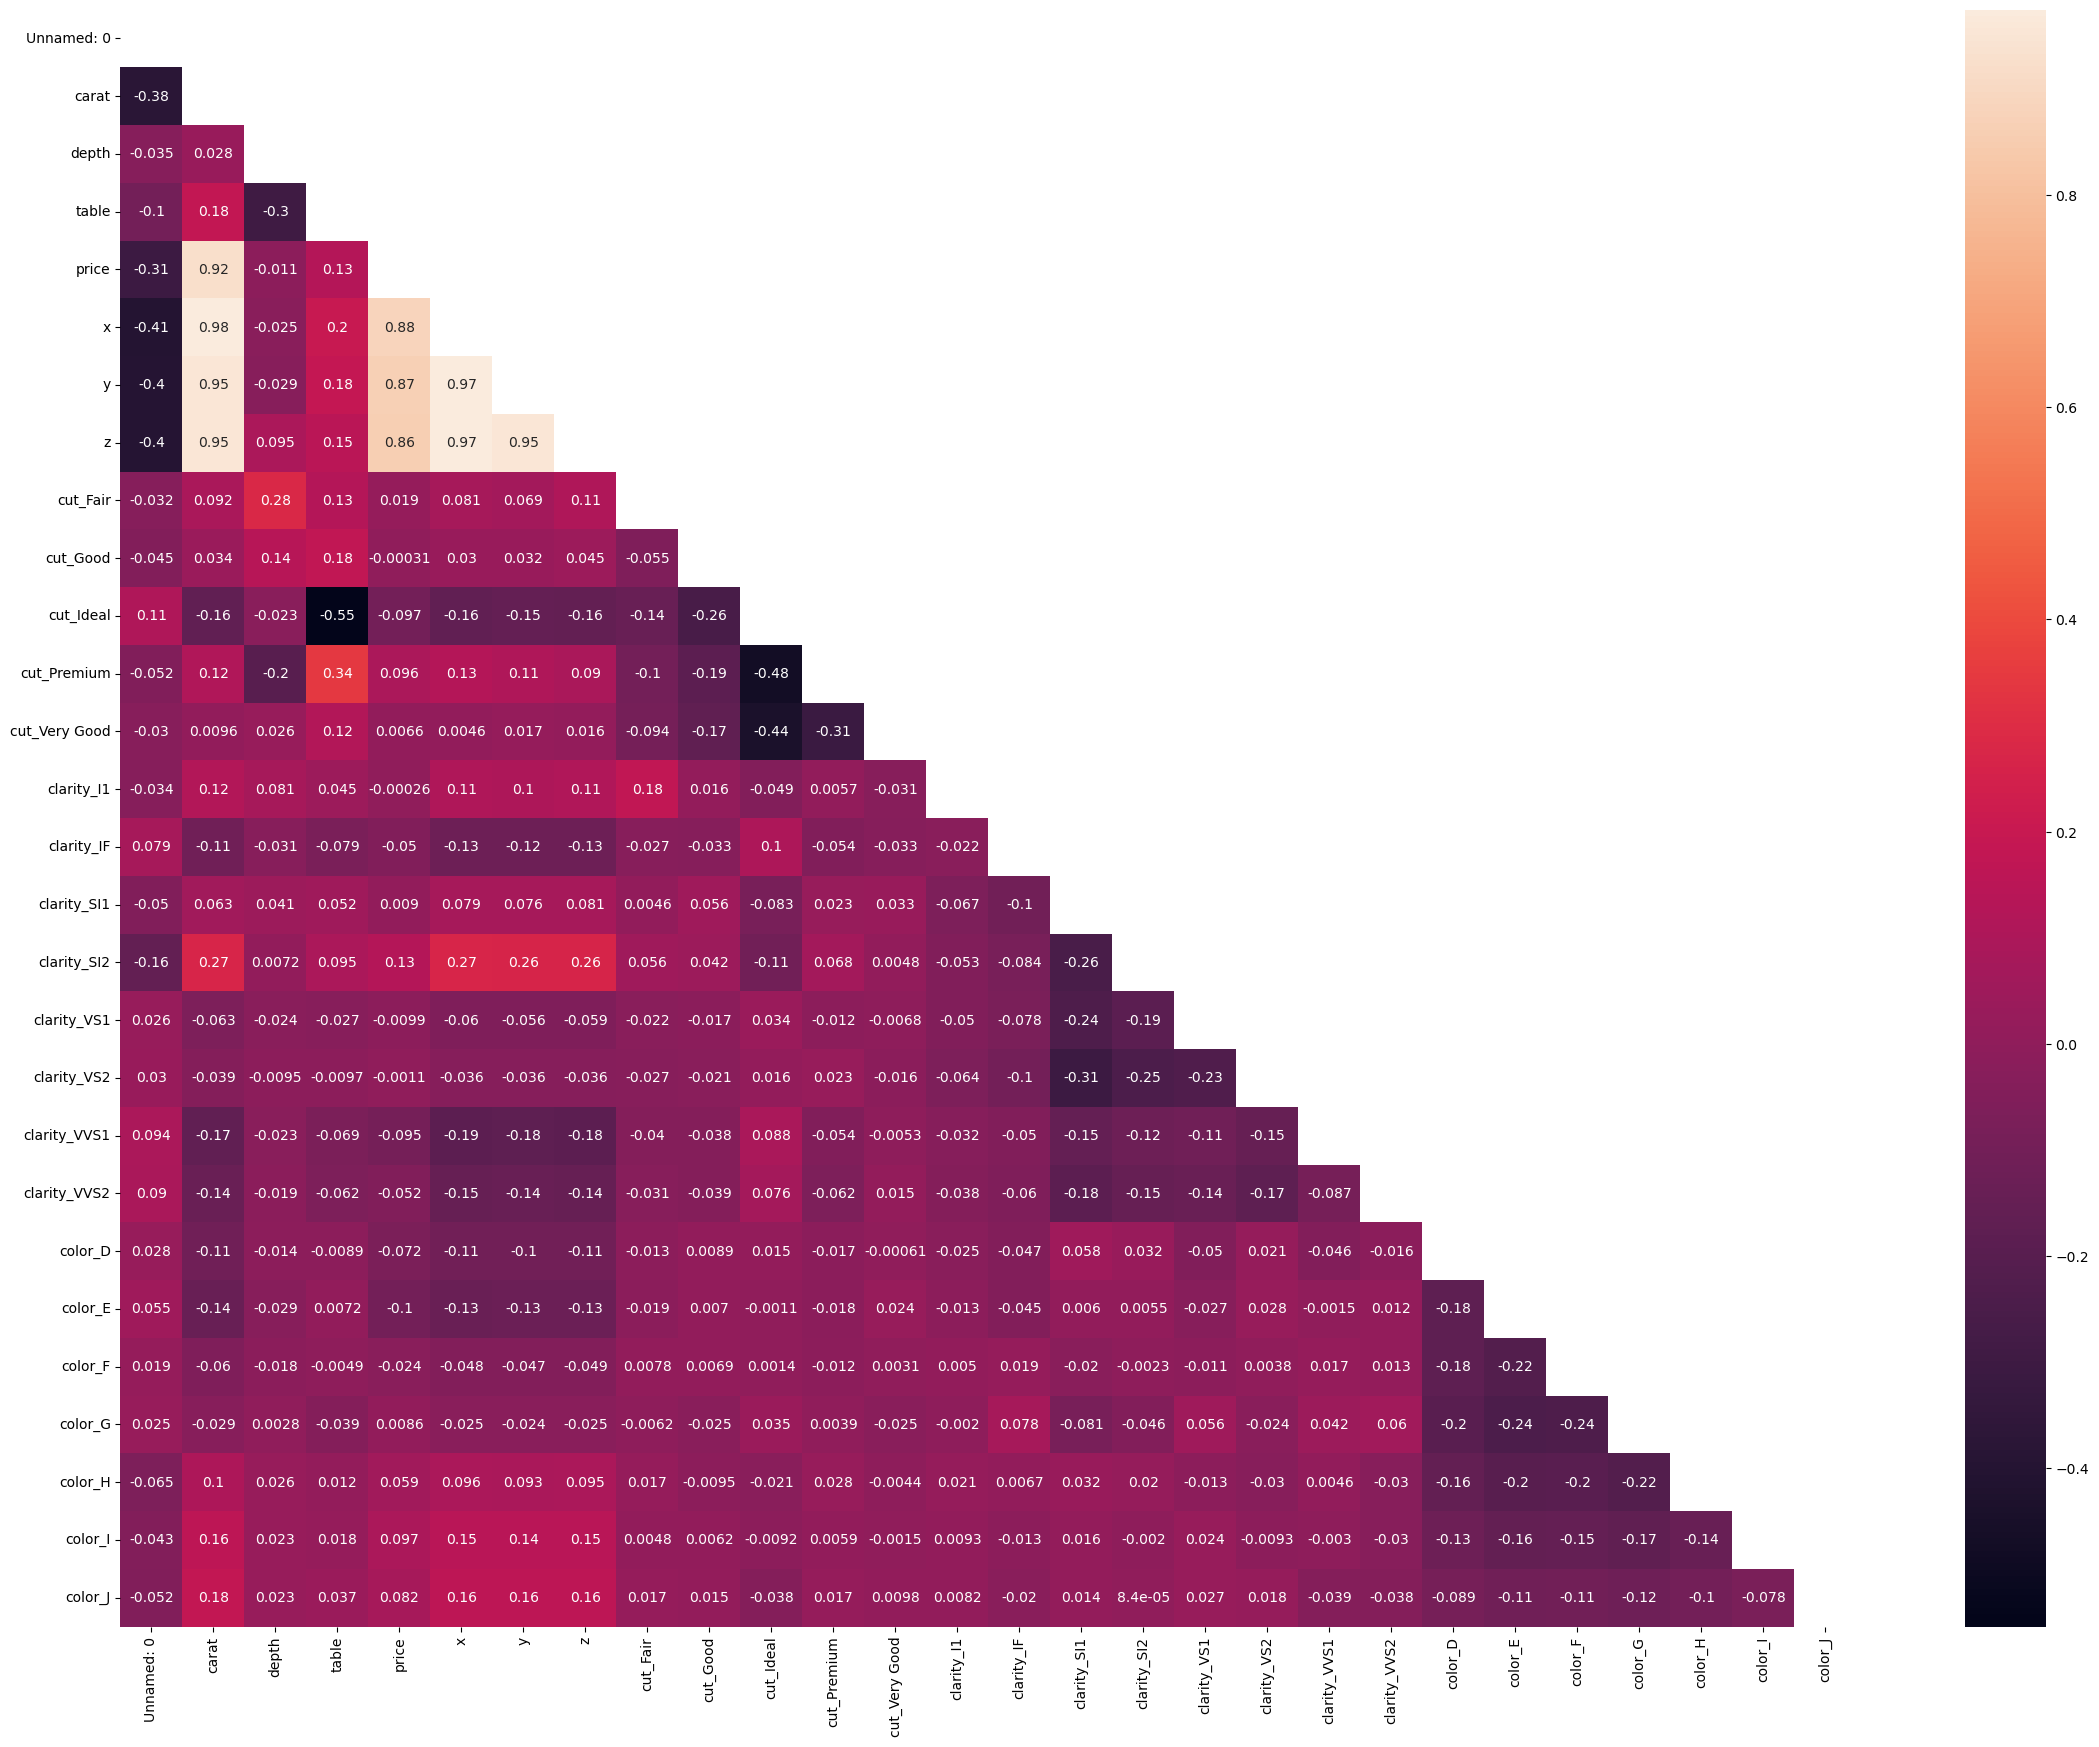

In [9]:
plt.figure(figsize=(28, 21))
sns.heatmap(df.corr(), annot=True, mask=np.triu(df.corr()))

## understanding the distribution

C:\Users\M0jtabav1\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


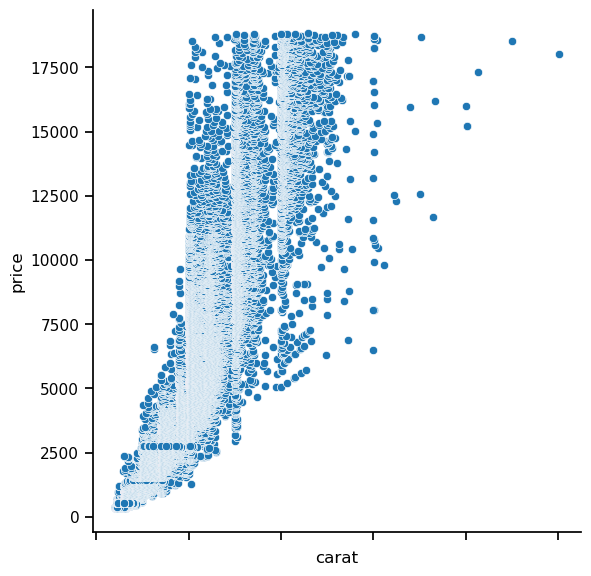

In [10]:
#understanding the distribution with seaborn
with sns.plotting_context("notebook",font_scale=1):
    g = sns.pairplot(df, x_vars=['carat'] , y_vars='price',height=6)
g.set(xticklabels=[]);

# feature selection 

In [11]:
# Update problem from multivariate to univariate 
x = df['carat']
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [12]:
# Let's now take a look at the train dataset

X_train.head()

29477    0.32
52542    0.72
8725     0.38
15577    1.00
19651    1.70
Name: carat, dtype: float64

In [13]:
y_train.head()

29477     702
52542    2532
8725      586
15577    6249
19651    8263
Name: price, dtype: int64

# Linear and Polynomial Regression

In [14]:
# Train linear regression model on whole dataset
OrderedID   = np.argsort(X_train)
x = np.array(X_train)[OrderedID]
y = np.array(y_train)[OrderedID]

lr = LinearRegression()
lr.fit(x.reshape(-1, 1), y)

poly2d = PolynomialFeatures(degree=2, include_bias=False)
poly3d = PolynomialFeatures(degree=3, include_bias=False)
poly4d = PolynomialFeatures(degree=4, include_bias=False)
poly5d = PolynomialFeatures(degree=5, include_bias=False)
poly10d = PolynomialFeatures(degree=10, include_bias=False)
poly20d = PolynomialFeatures(degree=20, include_bias=False)

poly2d_features = poly2d.fit_transform(x.reshape(-1, 1))
poly3d_features = poly3d.fit_transform(x.reshape(-1, 1))
poly4d_features = poly4d.fit_transform(x.reshape(-1, 1))
poly5d_features = poly5d.fit_transform(x.reshape(-1, 1))
poly10d_features = poly10d.fit_transform(x.reshape(-1, 1))
poly20d_features = poly20d.fit_transform(x.reshape(-1, 1))

# Train polynomial regression model on the whole dataset
lr_2d = LinearRegression()
lr_2d.fit(poly2d_features, y)
print(lr_2d.intercept_, lr_2d.coef_)

lr_3d = LinearRegression()
lr_3d.fit(poly3d_features, y)
print(lr_3d.intercept_, lr_3d.coef_)

lr_4d = LinearRegression()
lr_4d.fit(poly4d_features, y)
print(lr_4d.intercept_, lr_4d.coef_)

lr_5d = LinearRegression()
lr_5d.fit(poly5d_features, y)
print(lr_5d.intercept_, lr_5d.coef_)

lr_10d = LinearRegression()
lr_10d.fit(poly10d_features, y)
print(lr_10d.intercept_, lr_10d.coef_)

lr_20d = LinearRegression()
lr_20d.fit(poly20d_features, y)
print(lr_20d.intercept_, lr_20d.coef_)

-1858.2299746642802 [6744.65950996  483.04804444]
-285.7494541699689 [ 1151.3033765   5477.85634953 -1213.1223623 ]
1495.2887398807788 [-6615.77241888 15116.19429447 -5455.62385131   567.38433108]
1022.8382499385916 [-4148.13314441 11014.06510471 -2623.76594546  -263.36279644
    83.23622395]
-1995.7577380268858 [ 2.27300887e+04 -8.68518966e+04  1.91893235e+05 -2.33747876e+05
  1.76167174e+05 -8.44181684e+04  2.55016501e+04 -4.67944323e+03
  4.75107935e+02 -2.04450279e+01]
1329.2642288535344 [-1.24314440e+04  5.33407635e+04 -7.12534662e+04  2.61956036e+03
  6.72053713e+04  7.32290709e+03 -6.47745391e+04 -2.74611056e+04
  5.92114211e+04  3.76408382e+04 -6.35994125e+04 -2.20740008e+04
  8.34921936e+04 -7.02102626e+04  3.27726014e+04 -9.70686904e+03
  1.87481297e+03 -2.29946188e+02  1.63155159e+01 -5.11077160e-01]


In [15]:
y_hat = lr_5d.predict(poly5d_features)
loss_train = mean_squared_error(y, y_hat)
print(loss_train)

2070490.4359489274


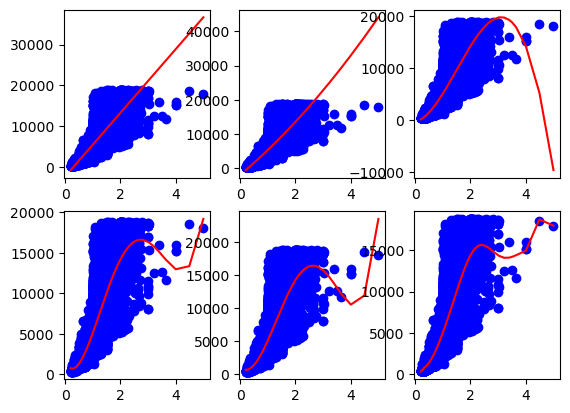

In [16]:
# Visualising the Linear Regression results

fig, ax = plt.subplots(nrows=2, ncols=3)
ax[0,0].scatter(x.reshape(-1, 1), y, color='blue')
ax[0,0].plot(x.reshape(-1, 1), lr.predict(x.reshape(-1, 1)), color='red')
#ax[0,0].title('Linear Regression')
#ax[0,0].xlabel('Carat')
#ax[0,0].ylabel('Price')

ax[0,1].scatter(x.reshape(-1, 1), y, color='blue')
ax[0,1].plot(x.reshape(-1, 1), lr_2d.predict(poly2d_features), color='red')
#ax[0,1].title('Polynomial Regression')
#ax[0,1].xlabel('Carat')
#ax[0,1].ylabel('Price')

ax[0,2].scatter(x.reshape(-1, 1), y, color='blue')
ax[0,2].plot(x.reshape(-1, 1), lr_3d.predict(poly3d_features), color='red')

ax[1,0].scatter(x.reshape(-1, 1), y, color='blue')
ax[1,0].plot(x.reshape(-1, 1), lr_4d.predict(poly4d_features), color='red')

ax[1,1].scatter(x.reshape(-1, 1), y, color='blue')
ax[1,1].plot(x.reshape(-1, 1), lr_5d.predict(poly5d_features), color='red')

ax[1,2].scatter(x.reshape(-1, 1), y, color='blue')
ax[1,2].plot(x.reshape(-1, 1), lr_10d.predict(poly10d_features), color='red')
 
plt.show()

# Kernel Regression

In [17]:
def kernel(x_i,x_j):
    #return np.dot(x_j,x_i) # Linear Kernel, same as not using Kernels at all
    #return np.dot(x_j,x_i)**2 # Polynomial Kernel
    return np.exp(-0.5*np.linalg.norm(x_i-x_j)) # Gaussian Kernel


# let's set up some non linear data
y= np.sin(x[:,0])+x[:,1]
y= x[:,0] + 4*np.sin(x[:,0])+ 4*np.random.rand(x.shape[0])

# We could just call the kernel function every time
# Instead we store the solutions in this matrix
# to save some computations
K=np.zeros((x.shape[0],x.shape[0]))
for i, row in enumerate(K):
    for j, col in enumerate(K.T):
        K[i,j]=kvernel(x[i,:],x[j,:])

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed